# Taller I: Speech Characterization

En este taller la idea es que generen un notebook de Jupyter donde obtengan una sñal devoz, a partir del microfono de su computador, en donde deben decir las vocales. Esta señal debe ser procesada utilizando el espectrograma, y el Me-Spectrograma para obtener una caracterización de los fonemas de las vocales.

Por medio de procesamiento del espectrograma deberan identificar los intervalos donde se pronunci un fonema, y realizar una grafica de la firma espectral de ese fonema junto con su desviación estandar.

Para realizar la obtención de la señal de voz pueden utulizar el paquete *sounddevice* de python. Las funciones para el espectrograma y el mel-spectrograma pueden encontrarlas en diferentes librerias de python, no es necesario qu elas implementen.

Para ayudar a guiar el desarrollo del taller, les adjunto un código en Matlab que reliza estas funciones.

## Víctor Samuel Pérez Díaz
## Nicolás Duque Báez

In [1]:
# Estas librerias fueron importadas en python 3.8.5. En 3.9 hay problemas.

import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from librosa import mel_frequencies
from librosa.feature import melspectrogram
from librosa.display import specshow
from scipy.io.wavfile import write
from scipy import signal as sig

In [ ]:
############## JUST RUN FOR RECORDING ##############
############## JUST RUN FOR RECORDING ##############
############## JUST RUN FOR RECORDING ##############
############## IR AL SIGUIENTE PASO   ##############

# Setting the interfaz to acquire de audio data
fs = 8000  # Sample rate
seconds = 5  # Duration of recording

myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1, dtype='int16')

# Acquiring audio data
print('Start speaking.') 
sd.wait()  # Wait until recording is finished
print('End of Recording.')

write('output.wav', fs, myrecording)  # Save as WAV file 

In [2]:
# Extracting audio
import soundfile as sf

y, fs = sf.read('output.wav')
y = y/np.std(y)
sd.play(y, fs)

In [3]:
y.shape

(40000,)

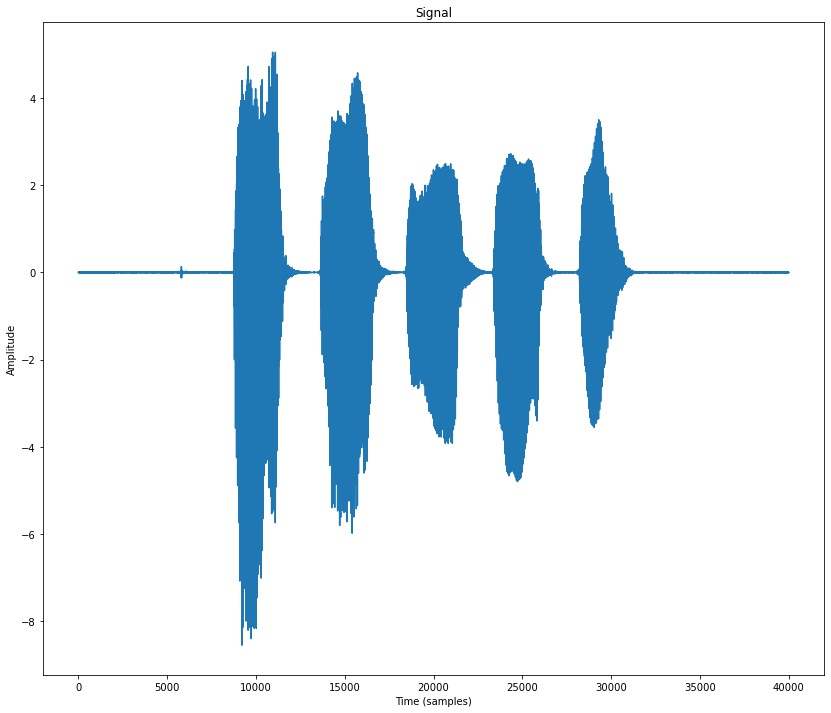

In [4]:
plt.figure(figsize=(14,12))
plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

#### Computing the spectogram

In [5]:
# Computing the spectogram

len_win = int(np.fix(0.02*fs)) # Defining the samples for a 20ms window
window = np.hanning(len_win) # Computing the window length to compute the spectrogram
len_over = int(np.fix(0.01*fs)) # Defining number of samples for an overlap of 10ms between consecutive windows
nfft = 512 # Number of points for the FFT

In [6]:
[f,t,Sxx] = sig.spectrogram(y,fs,window,nperseg = len_win, noverlap = len_over, nfft = nfft)

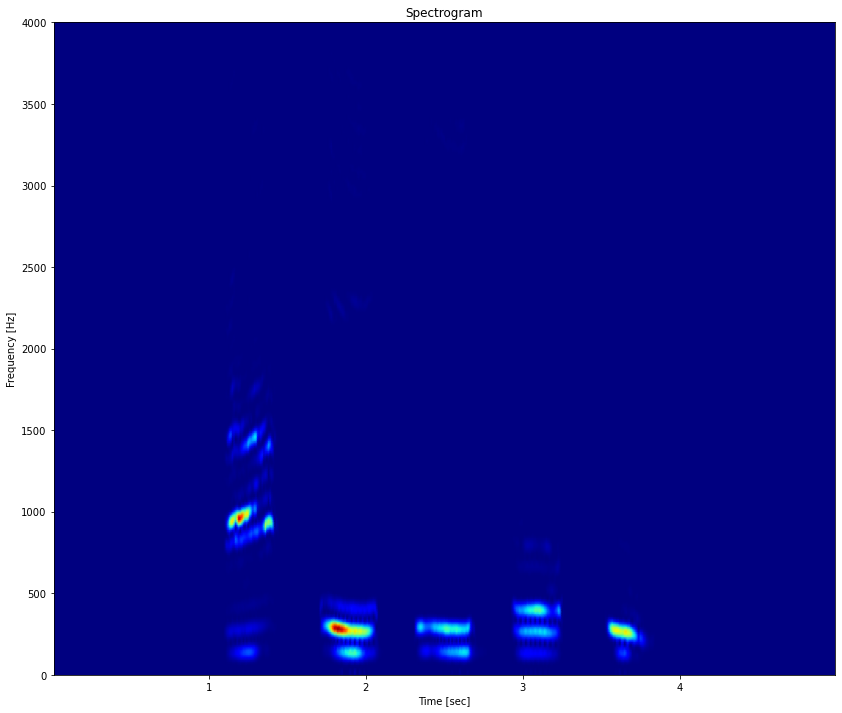

In [7]:
plt.figure(figsize=(14,12))
plt.pcolormesh(t, f, Sxx, cmap='jet', shading='gouraud')
plt.title('Spectrogram');
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

#### Computing the Mel-Spectogram

In [8]:
# Computing the Mel-Spectrogram
n_coeff = 32

Sm = melspectrogram(y=y, sr=fs, window = window, win_length = 160, n_fft=nfft, hop_length=len_over, n_mels = n_coeff)
fm = mel_frequencies(n_mels=n_coeff, fmin=20, fmax=fs/2, htk=False)

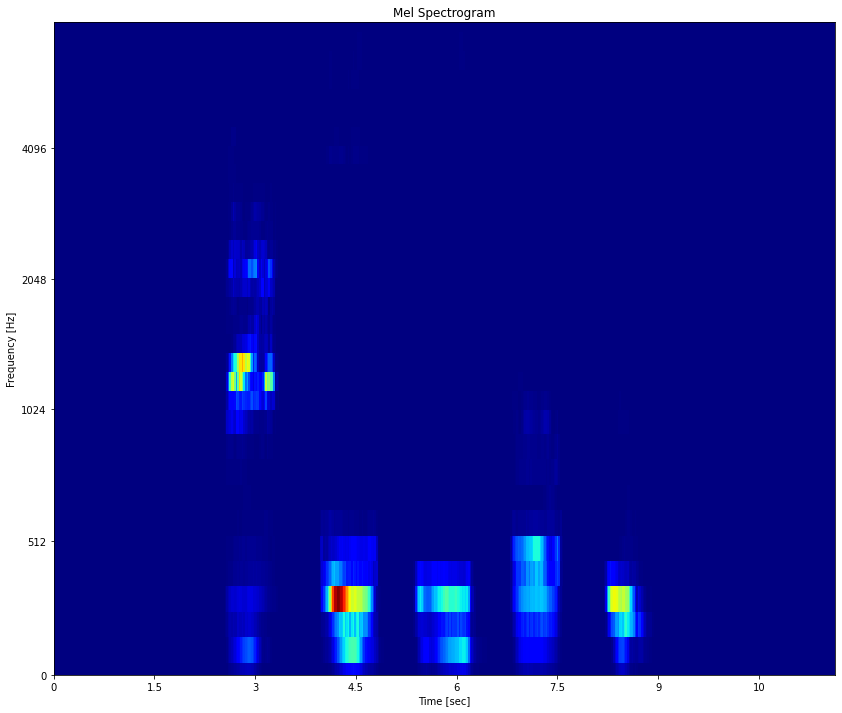

In [10]:
plt.figure(figsize=(14,12))
specshow(Sm, y_axis='mel', fmax=8000, x_axis='time', cmap='jet');
plt.title('Mel Spectrogram');
plt.ylabel('Frequency [Hz]');
plt.xlabel('Time [sec]');

#### Detecting changes in the Phonems

In [11]:
# Computing the absolute value of the spectrogram
Sw = np.abs(Sxx)

# Using the spectrogram

D_Sw = np.sqrt(np.ndarray.sum(((Sw[:,2:-1]-Sw[:,1:-2])**2), axis = 0));

# Using the Mel-Spectrogram

D_Sm = np.sqrt(np.ndarray.sum(((Sm[:,2:-1]-Sm[:,1:-2])**2), axis = 0));

#### Extracting elements for the different fonems

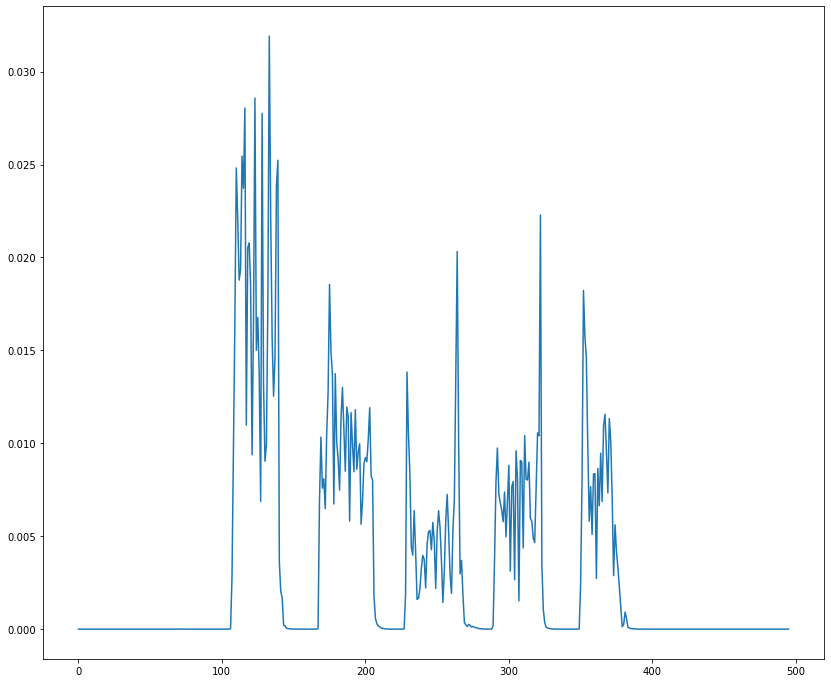

In [12]:
# Using the spectrogram

plt.figure(figsize=(14,12))
plt.plot(D_Sw);

In [13]:
a_s = np.arange(100,150)
e_s = np.arange(150,210)
i_s = np.arange(220, 280)
o_s = np.arange(290, 330)
u_s = np.arange(340, 400)

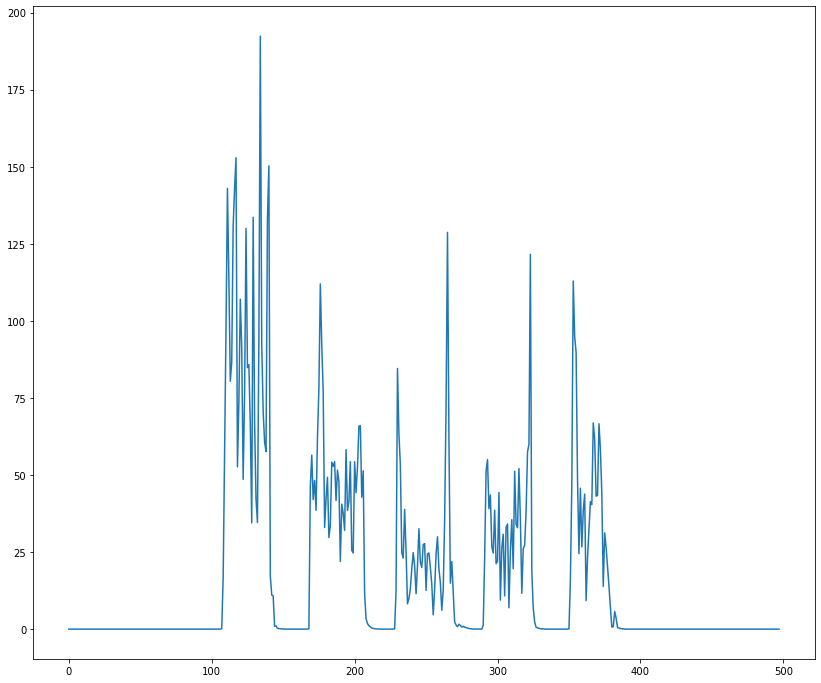

In [14]:
# Using the Mel-Spectrogram

plt.figure(figsize=(14,12))
plt.plot(D_Sm);

In [15]:
a_m = np.arange(100,150)
e_m = np.arange(150,210)
i_m = np.arange(220, 280)
o_m = np.arange(290, 330)
u_m = np.arange(340, 400)

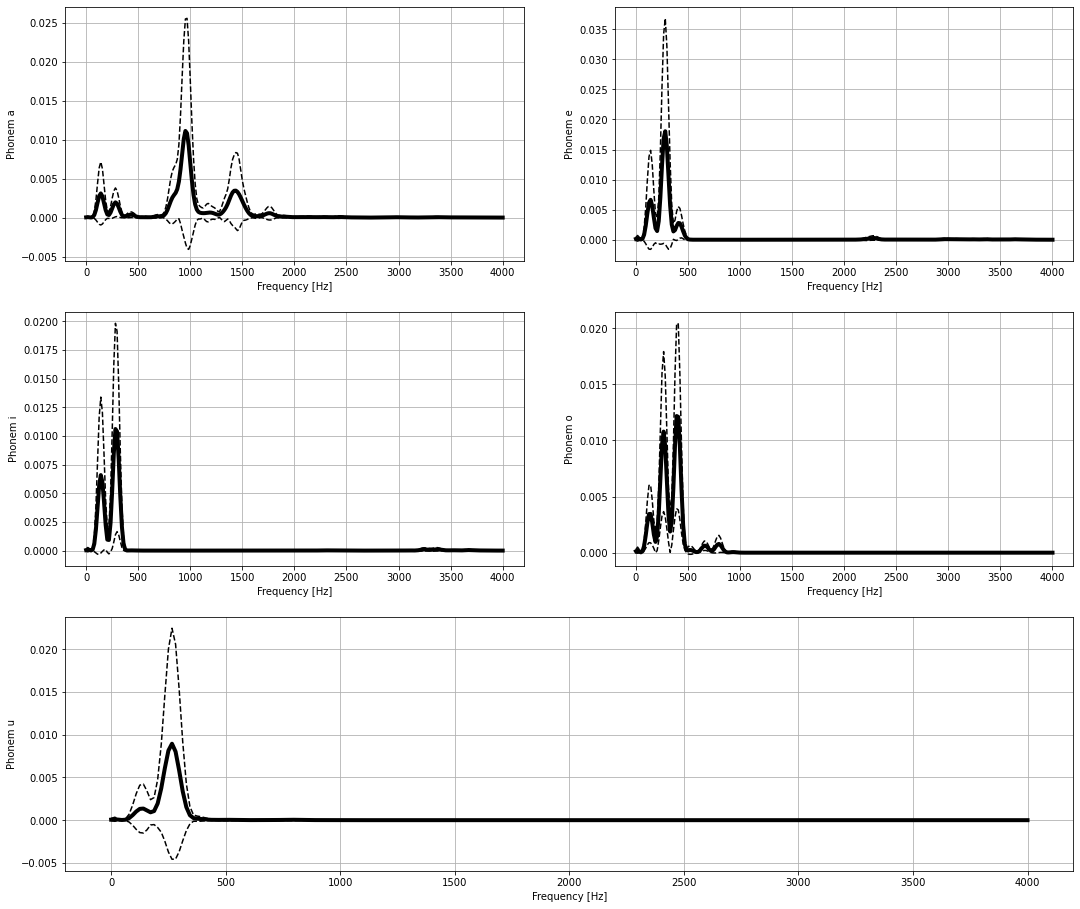

In [16]:
# Plots for the signature of the different vocal phonems using the Spectrogram 

fig = plt.figure(figsize=(14, 12))
plt.subplots_adjust(bottom = 0., left = 0, top = 1., right = 1)

sub1 = fig.add_subplot(3,2,1) 
sub2 = fig.add_subplot(3,2,2) 
sub3 = fig.add_subplot(3,2,3) 
sub4 = fig.add_subplot(3,2,4) 
sub5 = fig.add_subplot(3,2,(5,6)) 

sub1.plot(f, np.mean(Sw[:,a_s+1],axis=1), 'k', linewidth=4)
sub1.set_ylabel('Phonem a');
sub1.set_xlabel('Frequency [Hz]');
sub1.grid()
sub1.plot(f, np.mean(Sw[:,a_s+1],axis=1)+np.std(Sw[:,a_s+1],axis=1), 'k--')
sub1.plot(f, np.mean(Sw[:,a_s+1],axis=1)-np.std(Sw[:,a_s+1],axis=1), 'k--')

sub2.plot(f, np.mean(Sw[:,e_s+1],axis=1), 'k', linewidth=4)
sub2.set_ylabel('Phonem e');
sub2.set_xlabel('Frequency [Hz]');
sub2.grid()
sub2.plot(f, np.mean(Sw[:,e_s+1],axis=1)+np.std(Sw[:,e_s+1],axis=1), 'k--')
sub2.plot(f, np.mean(Sw[:,e_s+1],axis=1)-np.std(Sw[:,e_s+1],axis=1), 'k--')

sub3.plot(f, np.mean(Sw[:,i_s+1],axis=1), 'k', linewidth=4)
sub3.set_ylabel('Phonem i');
sub3.set_xlabel('Frequency [Hz]');
sub3.grid()
sub3.plot(f, np.mean(Sw[:,i_s+1],axis=1)+np.std(Sw[:,i_s+1],axis=1), 'k--')
sub3.plot(f, np.mean(Sw[:,i_s+1],axis=1)-np.std(Sw[:,i_s+1],axis=1), 'k--')

sub4.plot(f, np.mean(Sw[:,o_s+1],axis=1), 'k', linewidth=4)
sub4.set_ylabel('Phonem o');
sub4.set_xlabel('Frequency [Hz]');
sub4.grid()
sub4.plot(f, np.mean(Sw[:,o_s+1],axis=1)+np.std(Sw[:,o_s+1],axis=1), 'k--')
sub4.plot(f, np.mean(Sw[:,o_s+1],axis=1)-np.std(Sw[:,o_s+1],axis=1), 'k--')

sub5.plot(f, np.mean(Sw[:,u_s+1],axis=1), 'k', linewidth=4)
sub5.set_ylabel('Phonem u');
sub5.set_xlabel('Frequency [Hz]');
sub5.grid()
sub5.plot(f, np.mean(Sw[:,u_s+1],axis=1)+np.std(Sw[:,u_s+1],axis=1), 'k--')
sub5.plot(f, np.mean(Sw[:,u_s+1],axis=1)-np.std(Sw[:,u_s+1],axis=1), 'k--')

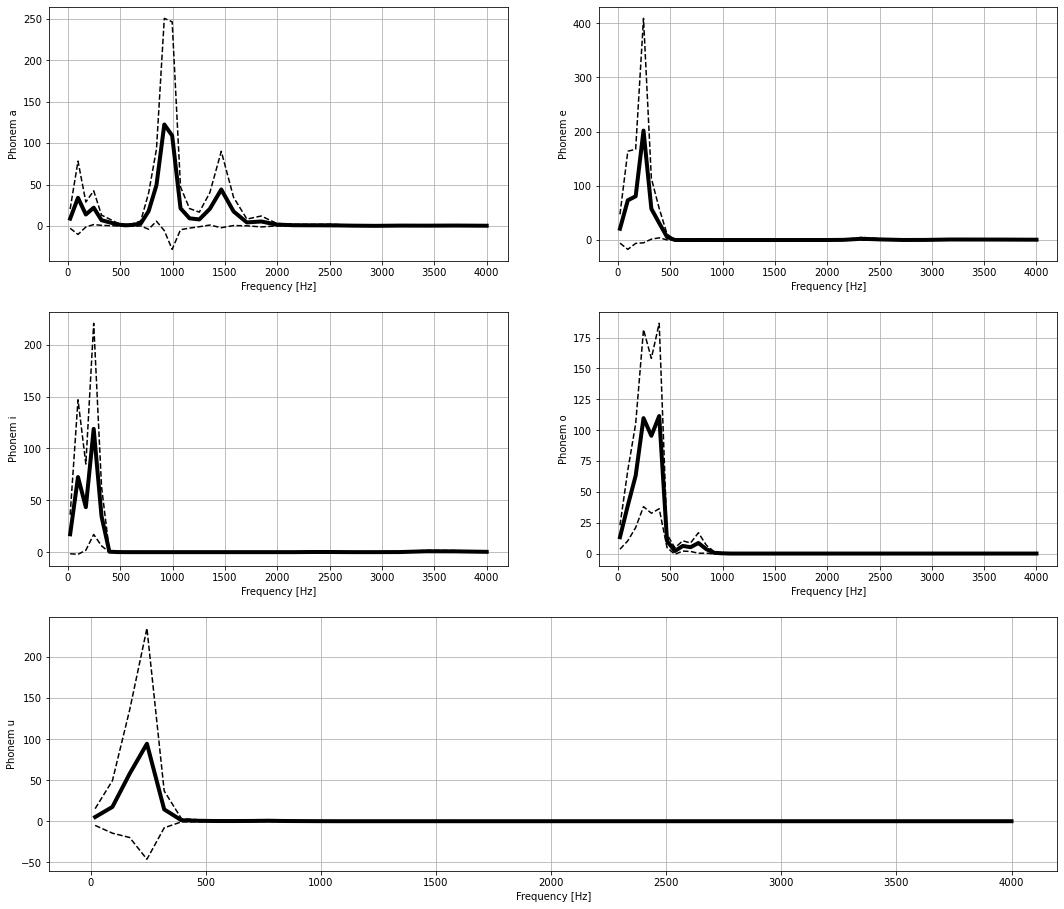

In [17]:
# Plots for the signature of the different vocal phonems using the Mel-Spectrogram 

fig = plt.figure(figsize=(14, 12))
plt.subplots_adjust(bottom = 0., left = 0, top = 1., right = 1)

sub1 = fig.add_subplot(3,2,1) 
sub2 = fig.add_subplot(3,2,2) 
sub3 = fig.add_subplot(3,2,3) 
sub4 = fig.add_subplot(3,2,4) 
sub5 = fig.add_subplot(3,2,(5,6)) 

sub1.plot(fm, np.mean(Sm[:,a_m+1],axis=1), 'k', linewidth=4)
sub1.set_ylabel('Phonem a');
sub1.set_xlabel('Frequency [Hz]');
sub1.grid()
sub1.plot(fm, np.mean(Sm[:,a_m+1],axis=1)+np.std(Sm[:,a_m+1],axis=1), 'k--')
sub1.plot(fm, np.mean(Sm[:,a_m+1],axis=1)-np.std(Sm[:,a_m+1],axis=1), 'k--')

sub2.plot(fm, np.mean(Sm[:,e_m+1],axis=1), 'k', linewidth=4)
sub2.set_ylabel('Phonem e');
sub2.set_xlabel('Frequency [Hz]');
sub2.grid()
sub2.plot(fm, np.mean(Sm[:,e_m+1],axis=1)+np.std(Sm[:,e_m+1],axis=1), 'k--')
sub2.plot(fm, np.mean(Sm[:,e_m+1],axis=1)-np.std(Sm[:,e_m+1],axis=1), 'k--')

sub3.plot(fm, np.mean(Sm[:,i_m+1],axis=1), 'k', linewidth=4)
sub3.set_ylabel('Phonem i');
sub3.set_xlabel('Frequency [Hz]');
sub3.grid()
sub3.plot(fm, np.mean(Sm[:,i_m+1],axis=1)+np.std(Sm[:,i_m+1],axis=1), 'k--')
sub3.plot(fm, np.mean(Sm[:,i_m+1],axis=1)-np.std(Sm[:,i_m+1],axis=1), 'k--')

sub4.plot(fm, np.mean(Sm[:,o_m+1],axis=1), 'k', linewidth=4)
sub4.set_ylabel('Phonem o');
sub4.set_xlabel('Frequency [Hz]');
sub4.grid()
sub4.plot(fm, np.mean(Sm[:,o_m+1],axis=1)+np.std(Sm[:,o_m+1],axis=1), 'k--')
sub4.plot(fm, np.mean(Sm[:,o_m+1],axis=1)-np.std(Sm[:,o_m+1],axis=1), 'k--')

sub5.plot(fm, np.mean(Sm[:,u_m+1],axis=1), 'k', linewidth=4)
sub5.set_ylabel('Phonem u');
sub5.set_xlabel('Frequency [Hz]');
sub5.grid()
sub5.plot(fm, np.mean(Sm[:,u_m+1],axis=1)+np.std(Sm[:,u_m+1],axis=1), 'k--')
sub5.plot(fm, np.mean(Sm[:,u_m+1],axis=1)-np.std(Sm[:,u_m+1],axis=1), 'k--')